# Churn Rate prediction for Credit Card Customers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
print(f'SkLearn {sklearn.__version__}\nNumpy {np.__version__}\nPandas {pd.__version__}')

SkLearn 0.24.1
Numpy 1.21.5
Pandas 1.2.4


# Import Data

In [2]:
path = "C:\\Users\\carlo\\Desktop\\MACHINE LEARNING\\DATASETS\\churn\\BankChurners.csv"
cst = pd.read_csv(path)


In [3]:
#dropping useless features (partly based on file description found on Kaggle)
cst.drop('CLIENTNUM',axis = 1, inplace = True)
cst.drop([cst.columns[-1], cst.columns[-2]],axis = 1,inplace = True)

# Visualizing the Data

In [4]:
cst.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
pd.DataFrame(cst.columns, columns = ['Attributes'])

,Attributes
0,Attrition_Flag
1,Customer_Age
2,Gender
3,Dependent_count
4,Education_Level
5,Marital_Status
6,Income_Category
7,Card_Category
8,Months_on_book
9,Total_Relationship_Count


In [6]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

No missing values, however by further inspection one can notice that missing values are simply replace by a string whose value is 'Unknown'

In [7]:
cst['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [8]:
cst['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [9]:
cst['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [10]:
cst['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

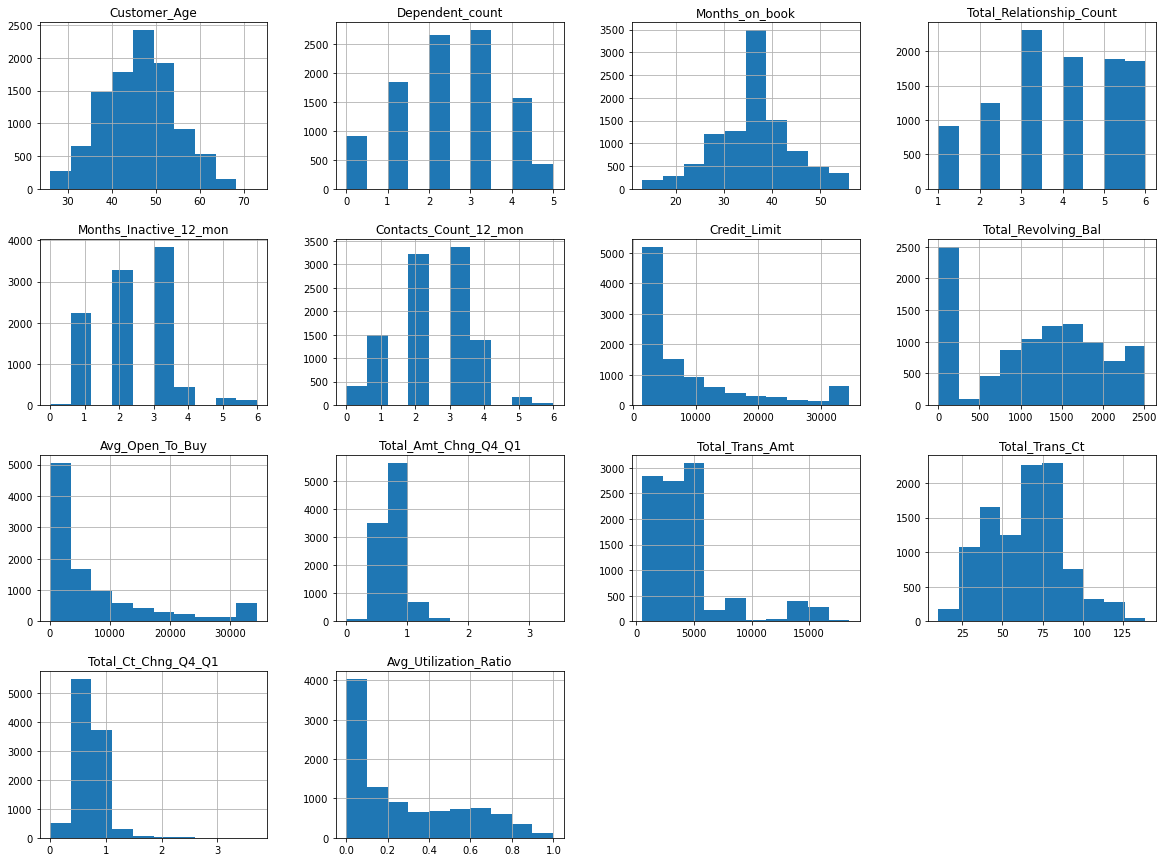

In [11]:
cst.hist(figsize = (20,15))
plt.show()

# Train/Test split

In [12]:
from sklearn.model_selection import train_test_split
cst_train, cst_test = train_test_split(cst, test_size = 0.2, random_state = 42)

# might try stratified by first categorizing income classes,
# will see after checking feature importance


# Handling Categoricals

In [13]:
cst_cat_broken = cst_train.select_dtypes(include = object).copy()
# for some reason to be understood some values are lost in this process, temporary solution follows

#marital status will be classifed through a one-hot classifier
cst_cat_broken.drop('Marital_Status',axis = 1, inplace = True)

cols_cat = list(cst_cat_broken.columns)
cst_cat = cst[cols_cat].copy()

In [14]:
cst_cat.info()
#why do I lose some entries????

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  10127 non-null  object
 3   Income_Category  10127 non-null  object
 4   Card_Category    10127 non-null  object
dtypes: object(5)
memory usage: 395.7+ KB


In [15]:
cat_s = [
 ['Existing Customer','Attrited Customer'],
 ['M', 'F'],
 ['Uneducated','High School','College',  'Graduate',  'Post-Graduate','Doctorate','Unknown'],
 ['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +','Unknown'],
 ['Blue', 'Silver', 'Gold', 'Platinum']]

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = cat_s, handle_unknown = 'use_encoded_value', unknown_value = np.nan)

cst_cat = ord_enc.fit_transform(cst_cat)
cst_cat = pd.DataFrame(cst_cat, columns = cols_cat)
cst_cat.head()

,Attrition_Flag,Gender,Education_Level,Income_Category,Card_Category
0,0.0,0.0,1.0,2.0,0.0
1,0.0,1.0,3.0,0.0,0.0
2,0.0,0.0,3.0,3.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0


In [17]:
[(cst_cat[i].value_counts()) for i in list(cst_cat.columns)]

[0.0    8500
 1.0    1627
 Name: Attrition_Flag, dtype: int64,
 1.0    5358
 0.0    4769
 Name: Gender, dtype: int64,
 3.0    3128
 1.0    2013
 6.0    1519
 0.0    1487
 2.0    1013
 4.0     516
 5.0     451
 Name: Education_Level, dtype: int64,
 0.0    3561
 1.0    1790
 3.0    1535
 2.0    1402
 5.0    1112
 4.0     727
 Name: Income_Category, dtype: int64,
 0.0    9436
 1.0     555
 2.0     116
 3.0      20
 Name: Card_Category, dtype: int64]

In [18]:
#temporary fix until I understand what is not working
#with OrdinalEncoder

cst_cat['Education_Level'].replace(6,np.nan, inplace = True)
cst_cat['Income_Category'].replace(5, np.nan, inplace= True)
cst_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  float64
 1   Gender           10127 non-null  float64
 2   Education_Level  8608 non-null   float64
 3   Income_Category  9015 non-null   float64
 4   Card_Category    10127 non-null  float64
dtypes: float64(5)
memory usage: 395.7 KB


In [26]:
mar_st = cst['Marital_Status'].to_numpy()
mar_st = mar_st.reshape(-1,1)

array([['Married'],
       ['Single'],
       ['Married'],
       ...,
       ['Married'],
       ['Unknown'],
       ['Married']], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories = [['Married','Single','Divorced']],sparse = False, handle_unknown = 'ignore')
mar_st_1hot = ohe.fit_transform(mar_st)
mar_st_1hot

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [37]:
np.sum(mar_st_1hot, axis = 0)

array([4687., 3943.,  748.])

In [39]:
cst['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [40]:
mar_st_1hot.shape

(10127, 3)

In [44]:
mar_st_1hot = pd.DataFrame(mar_st_1hot, columns = list(ohe.categories_))
mar_st_1hot.head()

,Married,Single,Divorced
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


Since a lot of useful info would be lost by simply getting rid of missing values, I decided to simply replace them with the median

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
cst_cat = pd.DataFrame(imputer.fit_transform(cst_cat),columns = cols_cat)

print(f'imputer strategy: {imputer.strategy}')
cst_cat.info()

imputer strategy: median
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  float64
 1   Gender           10127 non-null  float64
 2   Education_Level  10127 non-null  float64
 3   Income_Category  10127 non-null  float64
 4   Card_Category    10127 non-null  float64
dtypes: float64(5)
memory usage: 395.7 KB
